In [1]:
import json
import os
import pandas as pd

In [2]:
## Sum dictionaries
def add_dict(d1, d2):
    for k1 in d1.keys():
        for k2 in d1[k1].keys():
            d1[k1][k2] += d2[k1][k2]

In [3]:
## Baselines
baseline_files   = [os.path.join("../results/", fname) for fname in os.listdir("../results/") if "baseline" in fname and "json" in fname]
baseline_results = None 
for fname in baseline_files:
    if baseline_results is None:
        baseline_results = json.load(open(fname, "r"))
    else:
        add_dict(baseline_results, json.load(open(fname, "r")))
baseline_df = pd.DataFrame.from_records(baseline_results)
baseline_df = baseline_df.iloc[:,2:]
baseline_df = baseline_df.T.round(2)
baseline_df

,accuracy,auprc,f1,auroc,time
Linear SVM,0.95,0.92,0.95,0.95,19752.63
Log Reg,0.95,0.92,0.95,0.95,126.59
MLP,0.94,0.90,0.93,0.94,1506.45
NB,0.80,0.71,0.82,0.80,21.52
RBF SVM,0.95,0.93,0.95,0.95,25225.82


In [4]:
## KNN
knn_files   = [os.path.join("../results/", fname) for fname in os.listdir("../results/") if "KNN" in fname and "json" in fname]
knn_results = None 
for fname in knn_files:
    if knn_results is None:
        knn_results = json.load(open(fname, "r"))
    else:
        add_dict(knn_results, json.load(open(fname, "r")))
knn_df = pd.DataFrame.from_records(knn_results)
knn_df = knn_df.iloc[:,2:]
knn_df = knn_df.T.round(2)
knn_df = knn_df.iloc[:len(knn_files)-2,:]
knn_df

,accuracy,auprc,f1,auroc,time
KNN-15,0.68,0.64,0.55,0.67,10377.58
KNN-17,0.69,0.65,0.57,0.68,10979.94
KNN-19,0.70,0.66,0.58,0.69,10967.81
KNN-21,0.71,0.66,0.60,0.70,11090.60
KNN-3,0.77,0.71,0.74,0.77,11176.50
KNN-5,0.74,0.69,0.69,0.74,10014.54
KNN-7,0.72,0.67,0.64,0.71,11483.15
KNN-9,0.70,0.65,0.60,0.69,11389.89


In [5]:
## Parzen
parzen_files   = [os.path.join("../results/", fname) for fname in os.listdir("../results/") if "Parzen" in fname and "json" in fname]
parzen_results = None 
for fname in parzen_files:
    if parzen_results is None:
        parzen_results = json.load(open(fname, "r"))
    else:
        add_dict(parzen_results, json.load(open(fname, "r")))
parzen_df = pd.DataFrame.from_records(parzen_results)
parzen_df = parzen_df.iloc[:,2:]
parzen_df = parzen_df.T.round(2)
parzen_df = parzen_df.iloc[6:,:]
parzen_df

,accuracy,auprc,f1,auroc,time
Parzen-0.01,0.74,0.65,0.76,0.74,50233.05
Parzen-0.05,0.74,0.65,0.76,0.74,49052.06
Parzen-0.1,0.74,0.65,0.76,0.74,67516.09
Parzen-0.5,0.74,0.65,0.76,0.74,68830.92
Parzen-1,0.73,0.65,0.76,0.74,48808.16
Parzen-10,0.69,0.61,0.75,0.70,68715.34
Parzen-5,0.69,0.61,0.75,0.70,57335.28
Parzen-50,0.69,0.61,0.75,0.70,50593.84


In [6]:
## compile results
all_results_df = baseline_df.append(parzen_df).append(knn_df)

In [7]:
import matplotlib.pyplot as plt
from adjustText import adjust_text

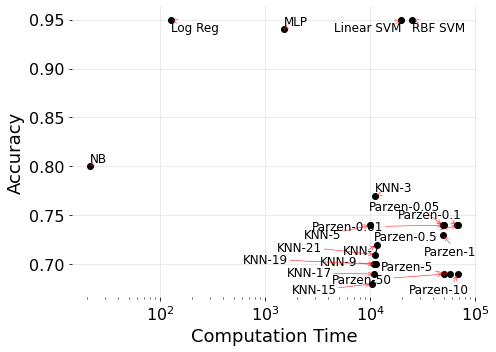

In [9]:
plt.figure(figsize=(7,5))
plt.grid(True, alpha = 0.3)
plt.box(False)
plt.plot(all_results_df["time"], all_results_df["accuracy"], "ko")
plt.xscale("log")
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel("Computation Time", fontsize = 18)
plt.ylabel("Accuracy", fontsize = 18)
texts = []
for i in range(len(all_results_df)):
    texts.append(plt.text(all_results_df["time"][i], all_results_df["accuracy"][i], all_results_df.index[i], fontsize = 12))
adjust_text(texts, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))
plt.tight_layout()
plt.savefig("../results/accuracy_vs_computation.png", dpi = 400, bbox_inches = 'tight')